# SVM

In this part, we will implement the SVM algorithm i.e. we will try to fit the decision boundary to a classification problem. For this purpose, we will only use the numpy and other libraries in the first part and in the second part we will use sklearn. In the third part, we will move beyond the traditional linear SVM and use kernel functions in SVM. 

## Part 1 - Implementation of SVM using Numpy

Firstly, we will import all the required libraries.

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Now we will read the dataset from kaggle. 

In [5]:
columns = ["id", "clump_thickness","Uniformity_of_cell_size","Uniformity_of_cell_shape","Marginal_Adhesion","Single_Epithelial_cell_size","Bare_Nuclei","Bland_Chromatin","Normal_Nucleoli","Mitoses","Cancer_State"]
df = pd.read_csv("C:\\Users\\varad\\Documents\\Machine Learning\\Datasets\\breast-cancer-wisconsin.data", names = columns)
df = df[df["Bare_Nuclei"] != '?']
df["Bare_Nuclei"] = df["Bare_Nuclei"].astype("float64")
df = df.reindex(range(len(df)))

In [6]:
# Now we will have a look at the data
df.head(100)
# The dataset has 2 output for benign and 4 for Malignant and all other columns will have a value between 1-10 

,id,clump_thickness,Uniformity_of_cell_size,Uniformity_of_cell_shape,Marginal_Adhesion,Single_Epithelial_cell_size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Cancer_State
0,1000025.0,5.0,1.0,1.0,1.0,2.0,1.0,3.0,1.0,1.0,2.0
1,1002945.0,5.0,4.0,4.0,5.0,7.0,10.0,3.0,2.0,1.0,2.0
2,1015425.0,3.0,1.0,1.0,1.0,2.0,2.0,3.0,1.0,1.0,2.0
3,1016277.0,6.0,8.0,8.0,1.0,3.0,4.0,3.0,7.0,1.0,2.0
4,1017023.0,4.0,1.0,1.0,3.0,2.0,1.0,3.0,1.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...
95,1164066.0,1.0,1.0,1.0,1.0,2.0,1.0,3.0,1.0,1.0,2.0
96,1165297.0,2.0,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,2.0
97,1165790.0,5.0,1.0,1.0,1.0,2.0,1.0,3.0,1.0,1.0,2.0
98,1165926.0,9.0,6.0,9.0,2.0,10.0,6.0,2.0,9.0,10.0,4.0


In [7]:
df = df[~(df.isnull().any(axis = 1))]

In [8]:
#Separate the Complete dataset into Training and Test Dataset

train_df = df.sample(frac = 0.75)
test_df = df.drop(index = train_df.index)

In [9]:
x_train, y_train = train_df.iloc[:,1:-1].values, train_df.iloc[:,-1].values
x_test, y_test = test_df.iloc[:,1:-1].values, test_df.iloc[:,-1].values

In [10]:
# We have to map the output of the model from {2,4} to {-1,1} as it is required for SVM.
y_train = y_train - 3
y_test = y_test - 3

In [11]:
# Now we will initialize all the hyperparameters of the model including the weights and bias

weights = np.ones(9)
bias = 0
epochs = 100
lr = 0.001
lambda_ = 0.01
training_error = []
training_accuracy = []
testing_error = []
testing_accuracy = []

In [12]:
for epoch in range(epochs):
    y_pred = np.matmul(x_train, weights) + bias
    output = y_pred*y_train
    error = 0
    for i in range(len(output)) :
        x = output[i]
        if x >= 1 :
            dw = lambda_*weights
            db = 0
            error = error + (lambda_/2)*np.sum(weights**2)
        else :
            dw = lambda_*weights - y_train[i]*x_train[i]
            db = - y_train[i]
            error = error + (lambda_/2)*np.sum(weights**2) + 1 - x
        weights = weights - lr*dw
        bias = bias - lr*db
    error = error/len(output)
    accuracy = np.count_nonzero(output >= 1)/len(output)
    training_error.append(error)
    training_accuracy.append(accuracy)
    
    y_pred = np.matmul(x_test, weights) + bias
    output = y_pred*y_test
    error = np.array([(lambda_/2)*np.sum(weights**2) if g >= 1 else (lambda_/2)*np.sum(weights**2) + 1 - g for g in output])
    accuracy = np.count_nonzero(output >= 1)/len(output)
    testing_error.append(np.mean(error))
    testing_accuracy.append(accuracy)

In [13]:
len(training_error)

100

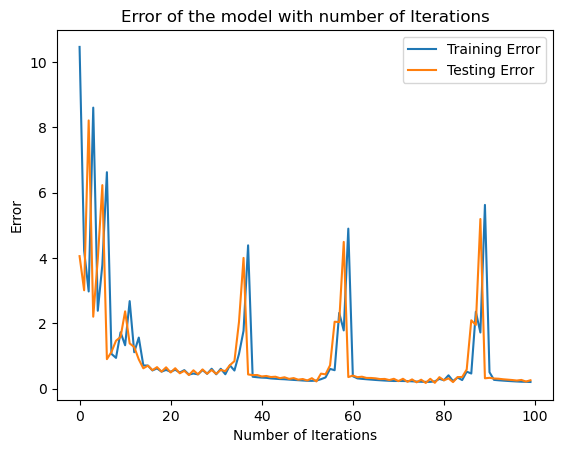

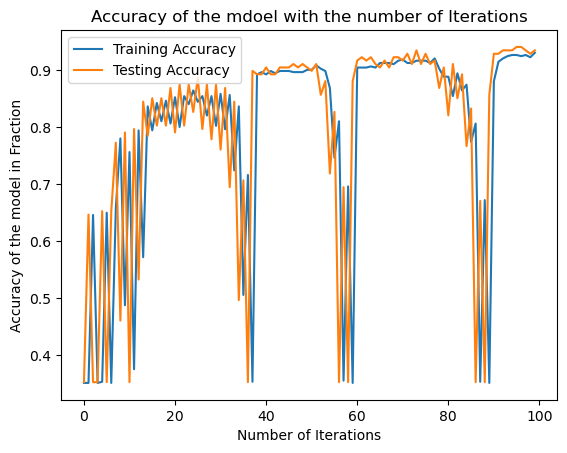

In [14]:
plt.xlabel("Number of Iterations")
plt.ylabel("Error")
plt.title("Error of the model with number of Iterations")
plt.plot(range(epochs),training_error, label = "Training Error")
plt.plot(range(epochs),testing_error, label = 'Testing Error')
plt.legend()
plt.show()

plt.figure()
plt.xlabel("Number of Iterations")
plt.ylabel("Accuracy of the model in Fraction")
plt.title("Accuracy of the mdoel with the number of Iterations")
plt.plot(range(epochs), training_accuracy, label = "Training Accuracy")
plt.plot(range(epochs), testing_accuracy, label = "Testing Accuracy")
plt.legend()
plt.show()

**Finally, We have completed the implementation of the SVM using numpy.**

## Part 2 - Implementation of SVM using SKLearn Library

**First, Let us import all the required libraries.**

In [25]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report

In [19]:
# Here we are defining the kernel to be linear as we want to implement the linear SVM in this part
svclassifier = SVC(kernel = 'linear')
svclassifier.fit(x_train, y_train)

SVC(kernel='linear')

In [21]:
y_pred = svclassifier.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)*100
confusion_mat = confusion_matrix(y_test, y_pred)

In [26]:
print("The accuracy of the model is", accuracy)
print("The confusion matrix for the model is")
print(confusion_mat)

print("The classification report for this model is")
print(classification_report(y_test, y_pred))

The accuracy of the model is 98.20359281437125
The confusion matrix for the model is
[[108   0]
 [  3  56]]
The classification report for this model is
              precision    recall  f1-score   support

        -1.0       0.95      1.00      0.97       108
         1.0       1.00      0.90      0.95        59

    accuracy                           0.96       167
   macro avg       0.97      0.95      0.96       167
weighted avg       0.97      0.96      0.96       167



## Part 3 - Implementation of Nonlinear SVM 

This won't be much different in implementation than the second part as we just have to change the kernel function and everything else will follow.

We will implement Polynomial, Gaussian and Sigmoid kernels to see which one works best.

### a) Polynomial Kernel 

In [31]:
polyclassifier = SVC(kernel = 'poly', degree = 2)
polyclassifier.fit(x_train, y_train)

SVC(degree=2, kernel='poly')

In [32]:
y_pred = polyclassifier.predict(x_test)

In [33]:
print("The accuracy score of the model is", accuracy_score(y_test, y_pred)*100)
print("The confusion matrix of the model is")
print(confusion_matrix(y_test, y_pred))

print("The classification report for the model is")
print(classification_report(y_test, y_pred))

The accuracy score of the model is 97.0059880239521
The confusion matrix of the model is
[[108   0]
 [  5  54]]
The classification report for the model is
              precision    recall  f1-score   support

        -1.0       0.96      1.00      0.98       108
         1.0       1.00      0.92      0.96        59

    accuracy                           0.97       167
   macro avg       0.98      0.96      0.97       167
weighted avg       0.97      0.97      0.97       167



### b) Gaussian Kernel

In [34]:
gausclassifier = SVC(kernel = 'rbf')
gausclassifier.fit(x_train, y_train)

SVC()

In [35]:
y_pred = gausclassifier.predict(x_test)

In [36]:
print("The accuracy score of the model is", accuracy_score(y_test, y_pred)*100)
print("The confusion matrix of the model is")
print(confusion_matrix(y_test, y_pred))

print("The classification report for the model is")
print(classification_report(y_test, y_pred))

The accuracy score of the model is 98.20359281437125
The confusion matrix of the model is
[[108   0]
 [  3  56]]
The classification report for the model is
              precision    recall  f1-score   support

        -1.0       0.97      1.00      0.99       108
         1.0       1.00      0.95      0.97        59

    accuracy                           0.98       167
   macro avg       0.99      0.97      0.98       167
weighted avg       0.98      0.98      0.98       167



### c) Sigmoid Kernel

In [37]:
sigclassifier = SVC(kernel = 'sigmoid')
sigclassifier.fit(x_train, y_train)

SVC(kernel='sigmoid')

In [38]:
y_pred = sigclassifier.predict(x_test)

In [39]:
print("The accuracy score of the model is", accuracy_score(y_test, y_pred)*100)
print("The confusion matrix of the model is")
print(confusion_matrix(y_test, y_pred))

print("The classification report for the model is")
print(classification_report(y_test, y_pred))

The accuracy score of the model is 41.31736526946108
The confusion matrix of the model is
[[69 39]
 [59  0]]
The classification report for the model is
              precision    recall  f1-score   support

        -1.0       0.54      0.64      0.58       108
         1.0       0.00      0.00      0.00        59

    accuracy                           0.41       167
   macro avg       0.27      0.32      0.29       167
weighted avg       0.35      0.41      0.38       167



As we can see from the above examples, the best kernel for the above data is gaussian along with linear SVM. Infact when we move to the higher degree of polynomials the accuracy is decreasing for the data.